## Подключим нужные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

## Для проверки ЦПТ возьмем распределение ${\chi}^2$

${\mathbb{E}}X = {k},  {\mathbb{D}}X = 2 {k}$ где ${k}$ - число степеней свободы

Возьмем 1000 элементов из распределения со средним 2 и дисперсией 4, 
построим распределение и теоретическую плотность:

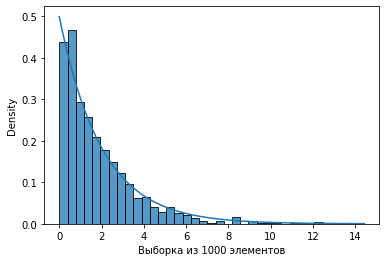

In [90]:
distr = sts.chi2(df=2, loc=0, scale=1)
rvs = distr.rvs(size=1000)
x = np.linspace(rvs.min(), rvs.max(), 1000)
sns.histplot(rvs, stat="density");
plt.plot(x, distr.pdf(x))
plt.xlabel("Выборка из 1000 элементов");

Вычислим теоретическое среднее и дисперсию

In [91]:
o_mean, o_var = distr.stats()
print("Теоретическое среднее и дисперсия: {}, {}".format(o_mean, o_var))

Теоретическое среднее и дисперсия: 2.0, 4.0


Возьмем 3 распределения выборочных средних и сравним их с теоретическим распределением средних:

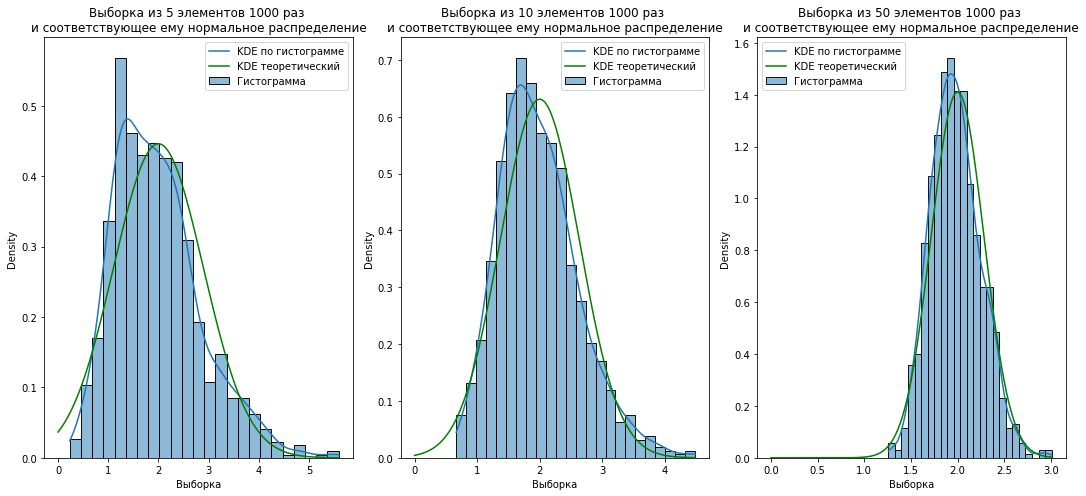

In [103]:
n = [5, 10, 50] # Количество выбранных элементов за 1 итерацию из 1000
f = {0: [], 
     1: [],
     2: []}
for _ in range(1000):
    for i in f:
        f[i].append(np.mean(distr.rvs(size=n[i])))

fig, axes = plt.subplots(ncols=3, figsize=(15, 7)) # Построим 3 subplots и на каждом разместим 2 графика
for i, ax in enumerate(axes):
    sns.histplot(f[i], ax=ax, stat="density", kde=True)
    ax.set_xlabel("Выборка")
    ax.set_title("Выборка из {} элементов 1000 раз \nи соответствующее ему нормальное распределение".format(n[i]))
    x = np.linspace(0, np.array(f[i]).max(), 1000) # Отсекаем лишние значения
    n_distrib = sts.norm(o_mean, (o_var / n[i]) ** .5) # Считаем теоретическое распределение средних
    ax.plot(x, n_distrib.pdf(x), color="green")
    ax.legend(["KDE по гистограмме", "KDE теоретический", "Гистограмма"])
plt.tight_layout() # Красивый вывод

## Вывод

Видная явная тенденция к нормализации гистограммы при увеличении количества взятых элементов за итерацию, если в случае 5 элементов гистограмму с трудом можно было бы назвать нормально распределенной (сдвиг влево), то крайняя правая уже гораздо больше похожа на нормальную. Точность аппроксимации увеличивается с увелечением количества элементов из выборки - быстрее сходится к среднему значению из генеральной совокупности и имеет меньший разброс (среднеквадратичное отклонение), что закономерно.

https://ru.wikipedia.org/wiki/Распределение_хи-квадрат - распределение Хи-квадрат